# Статистическая обработка случайных последовательностей. Идентификация законов распределения.

# 1. Статистическая обработка случайных последовательностей

## 1.1. Считывание выборки

In [1]:
import math

with open('input.txt', encoding='utf8') as f:
    content = f.readlines()

num = int(content[0].split(' = ')[1])
x = [float(i) for i in content[1].split(' ')]

print(num)


12200


In [2]:
import random

random.shuffle(x)


In [3]:
class Sample(object):
    
    def __init__(self, values):
        self.values = values
    
    def mean(self):
        return st.tmean(self.values)
    
    def median(self):
        return np.median(self.values)

    def mid(self):
        return (min(self.values) + max(self.values)) / 2
    
    def mode(self):
        return st.mode(self.values)[0][0]
    
    def variance(self):
        return np.var(self.values)
    
    def std(self):
        return np.std(self.values)
    
    def moment(self, k):
        return st.moment(self.values, k)
    
    def skewness(self):
        return st.skew(self.values)
    
    def kurtosis(self):
        return st.kurtosis(self.values)
    
    def percentile(self, q):
        return np.percentile(self.values, q)
    
    def interval_mean(self, q):
        c = self.mean()
        s = self.std()
        n = len(self.values)
        delta = s / math.sqrt(n) * st.t.ppf((1+q)/2, n - 1)
        left = c - delta
        right = c + delta
        return (left, right)
    
    def interval_variance(self, q):
        s = self.std()
        n = len(self.values)
        left = (n - 1) * (s ** 2) / st.chi2.ppf((1+q)/2, n - 1)
        right = (n - 1) * (s ** 2) / st.chi2.ppf((1-q)/2, n - 1)
        return (left, right)   
        
    def clopper_pearson(k, n, alpha):
        '''TODO alpha = 1 - p'''
        left = st.norm.ppf(alpha/2, k, n-k+1)
        right = st.norm.ppf(1 - alpha/2, k+1, n-k)
        return (left, right)

    def parametric_confidence_interval(self, confidence):
        m = self.mean()
        s = self.std()
        h = s * 1.886
        return (m - h, m + h)
    
        
    def __str__(self):
        return str(self.values)
    

In [4]:
samples = [Sample(x)]

samples_num = 10
for i in range(samples_num):
    start = int(i*num/10)
    end = int((i+1)*num/10)
    samples.append(Sample(x[start : end]))


## 1.2. Построение выборочной функции распределения и гистограмм

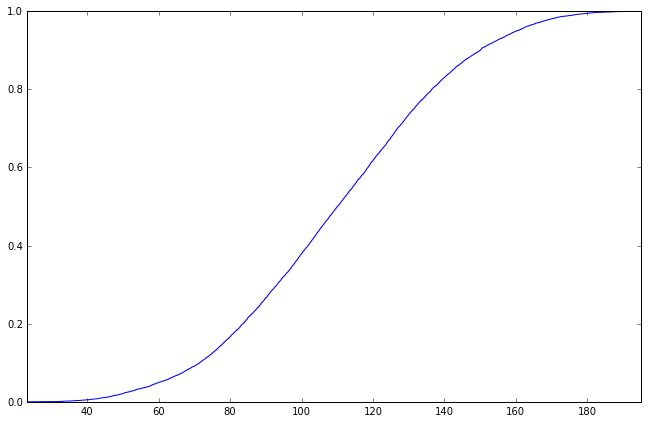

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

plt.figure(figsize=(11, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True)
plt.xlim([min(x), max(x)-1])
plt.show()
num_bins = 20

Построим абсолютные гистограммы.

[   10.    55.   165.   277.   390.   627.   921.  1110.  1212.  1272.
  1233.  1271.  1102.   892.   648.   454.   330.   150.    63.    18.]


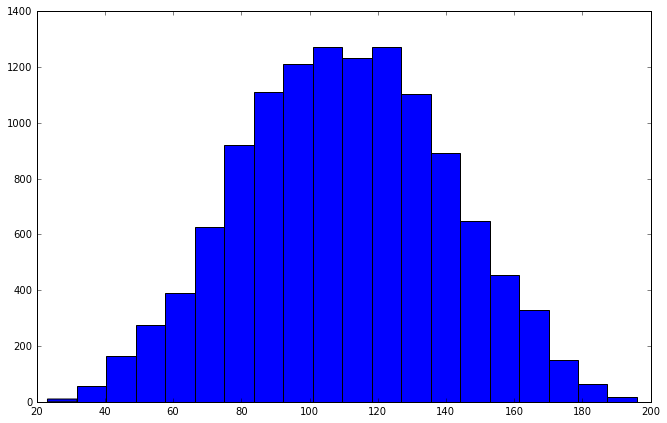

[   3.   13.   25.   30.   57.   66.   96.  105.  125.  127.  104.  126.
  108.   74.   50.   51.   31.   18.    8.    3.]


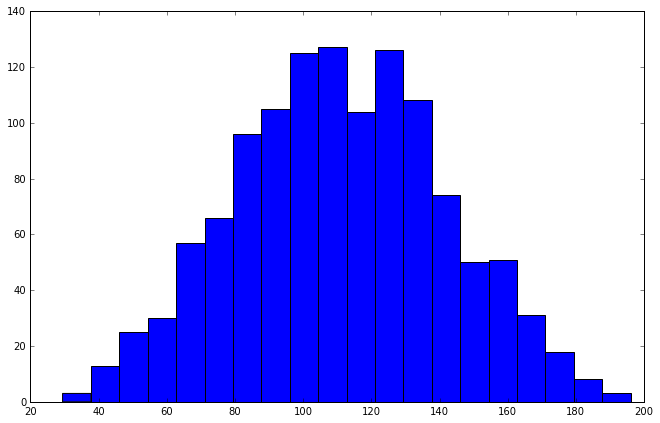

[   7.   17.   25.   38.   43.   76.   98.  118.  124.  123.   95.  110.
   80.   86.   56.   49.   48.   16.    8.    3.]


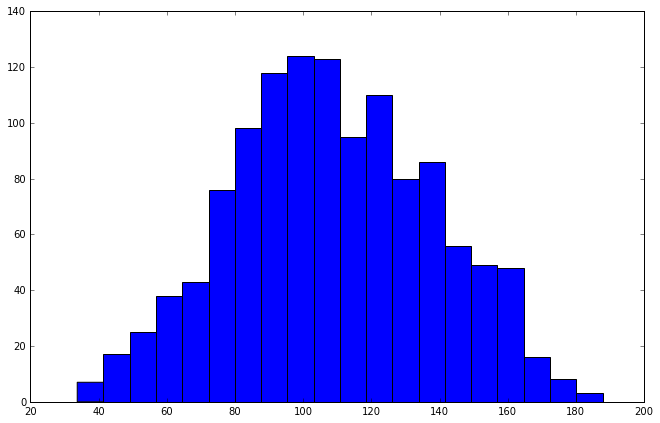

[   5.    8.   15.   27.   41.   60.   86.  103.  118.  119.  106.  109.
  124.   95.   75.   55.   43.   18.    8.    5.]


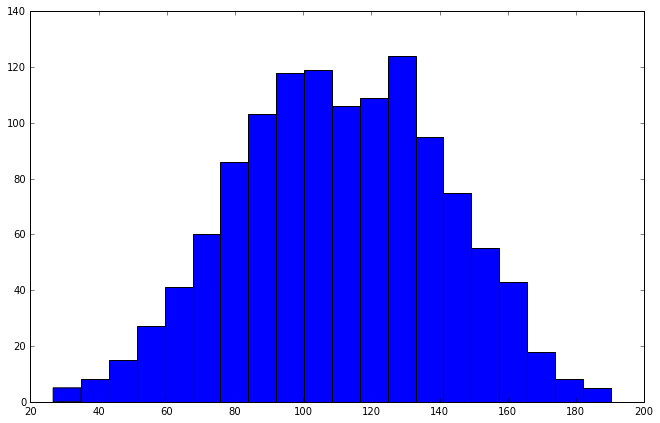

[   3.   12.   18.   25.   46.   73.  105.  105.  125.  108.  126.  134.
   94.   66.   73.   55.   26.   16.    8.    2.]


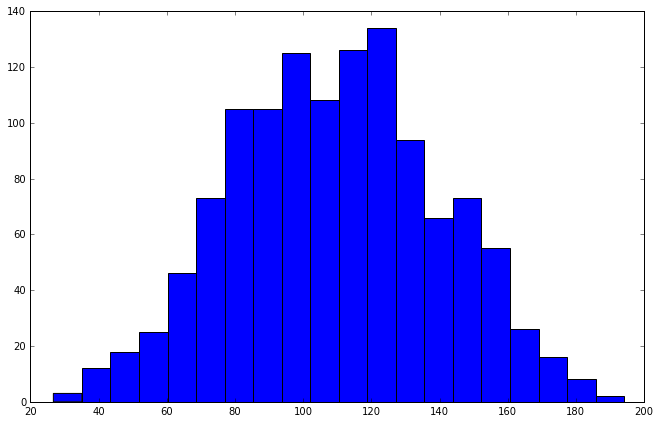

[   8.    6.   22.   21.   42.   60.   81.   88.  110.  118.  111.  101.
  119.   84.   81.   58.   41.   32.   23.   14.]


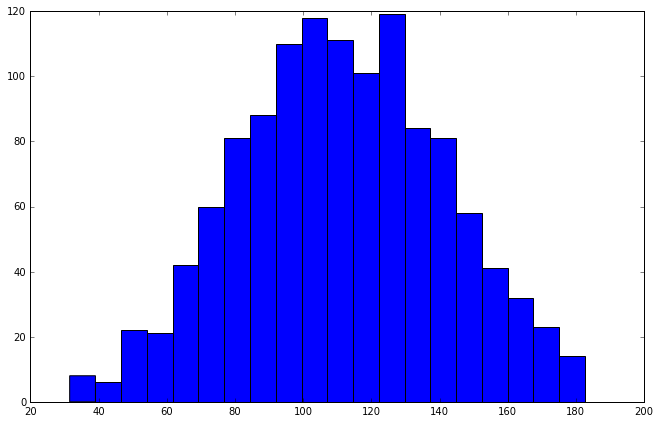

[   1.    4.   12.   24.   42.   58.   85.  103.  118.  140.  116.  117.
  106.  105.   72.   52.   28.   25.    9.    3.]


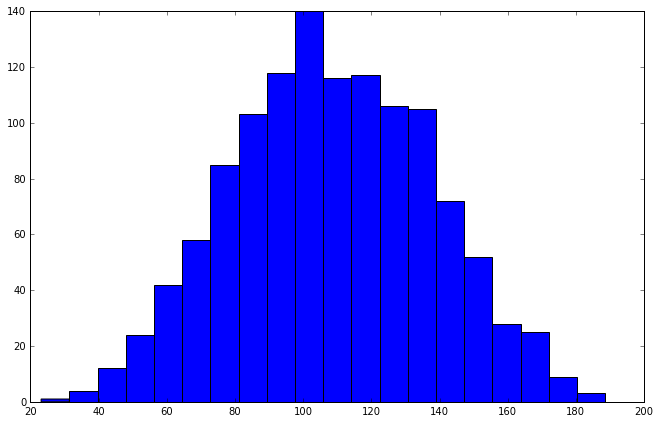

[   2.   12.   25.   27.   43.   59.   93.  111.  101.  111.  121.  124.
  111.   99.   61.   44.   39.   22.   10.    5.]


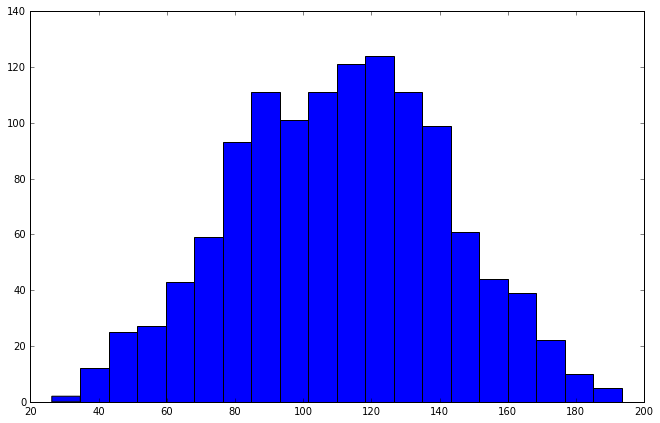

[   5.   11.   21.   27.   51.   75.   96.  117.  122.  110.  118.  114.
  119.   88.   50.   40.   36.   11.    6.    3.]


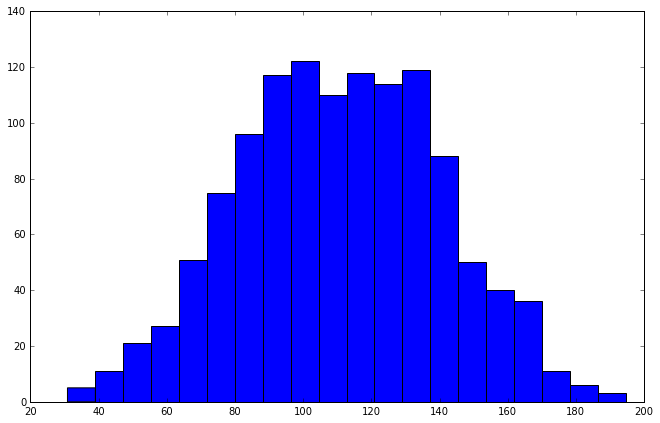

[   2.    5.   23.   28.   37.   70.   75.  114.   89.  110.  128.  118.
  119.   85.   81.   44.   34.   30.   22.    6.]


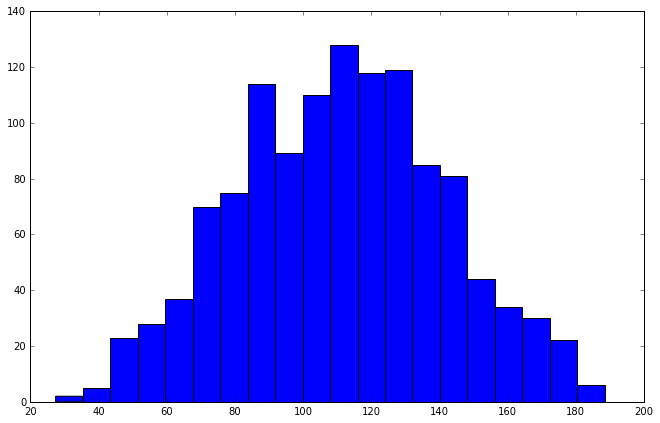

[   5.   13.   22.   41.   41.   83.   79.  106.  107.  111.  129.  139.
   97.   76.   60.   51.   28.   18.   10.    4.]


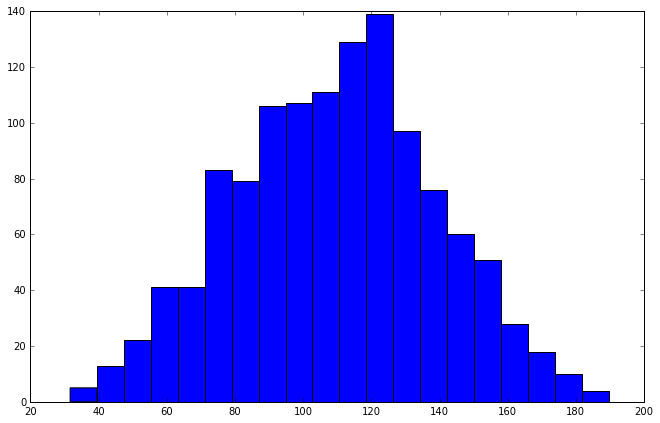

In [6]:
num_bins = 20

for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s.values, num_bins)
    print(n)
    plt.show()


Построим относительные гистограммы.

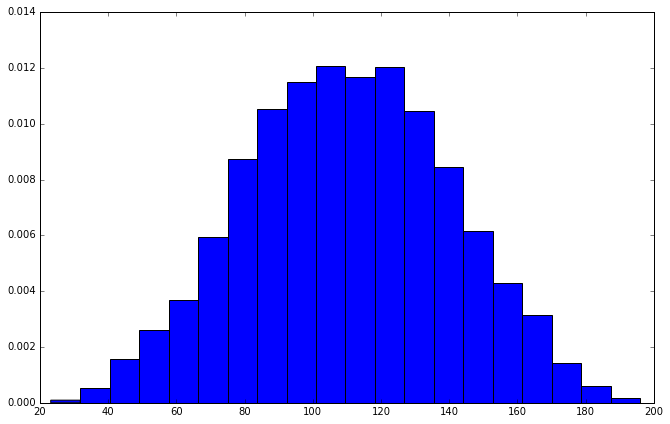

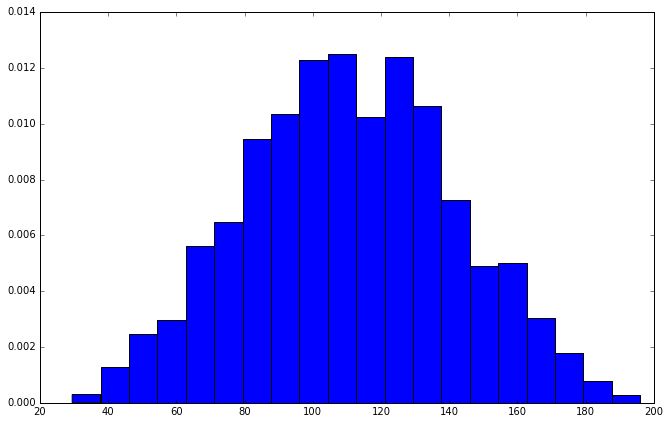

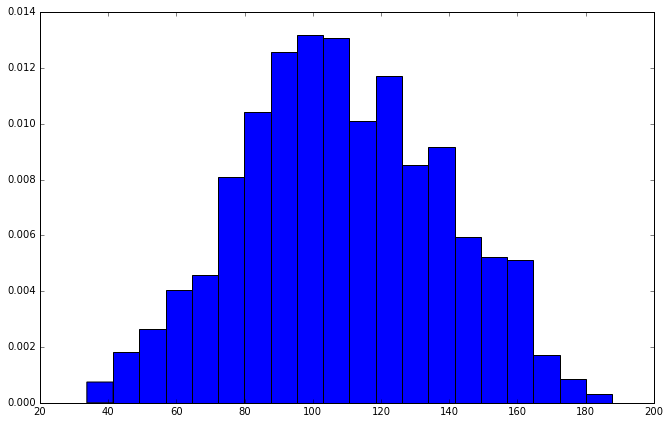

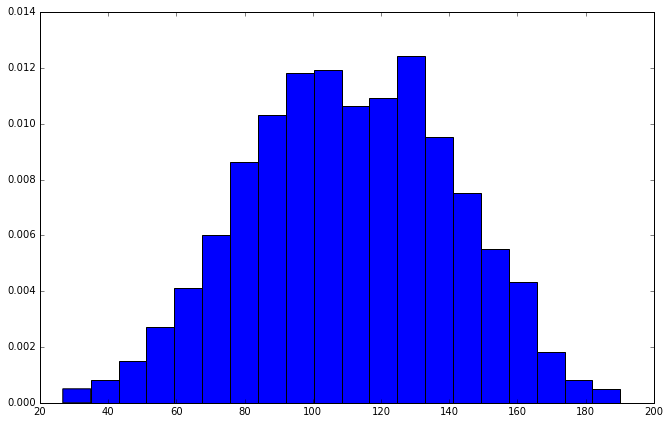

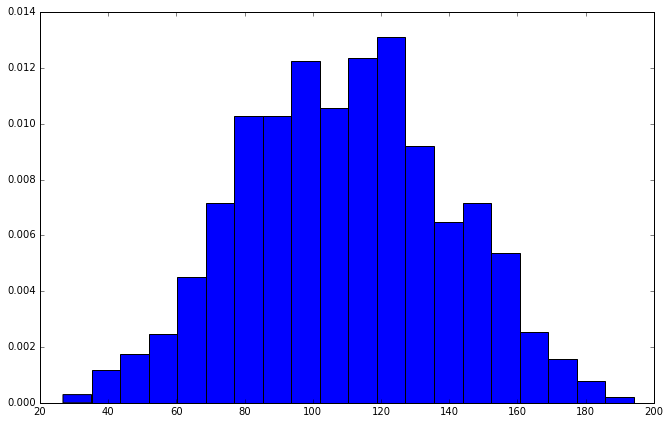

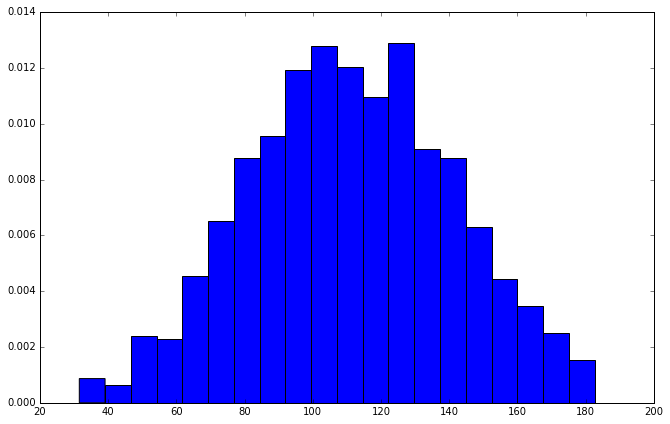

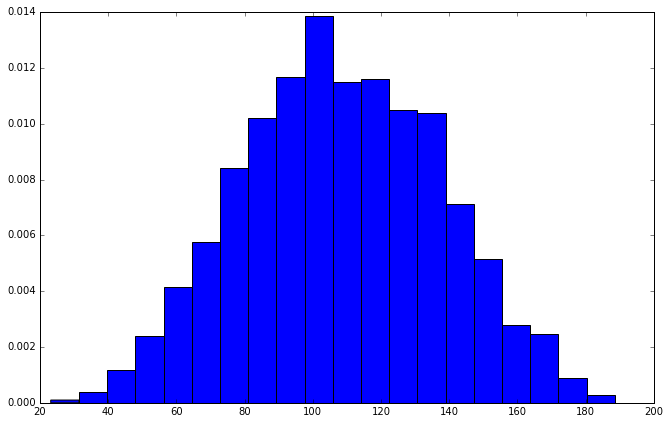

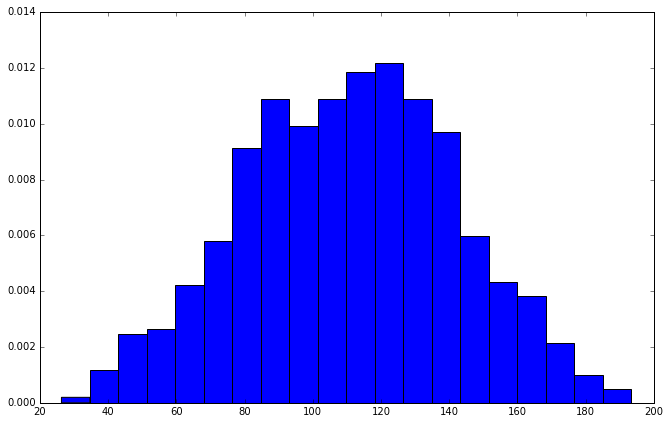

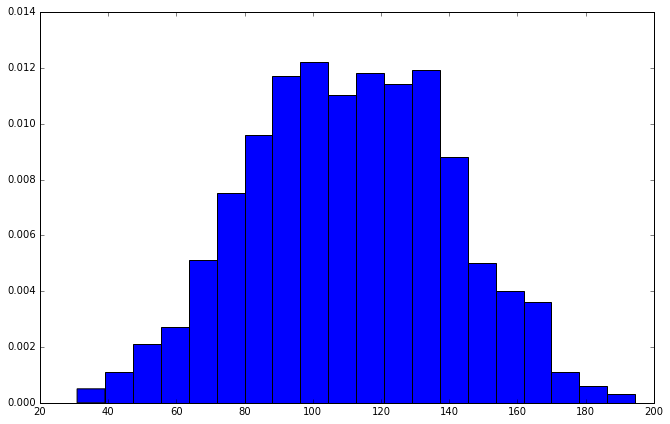

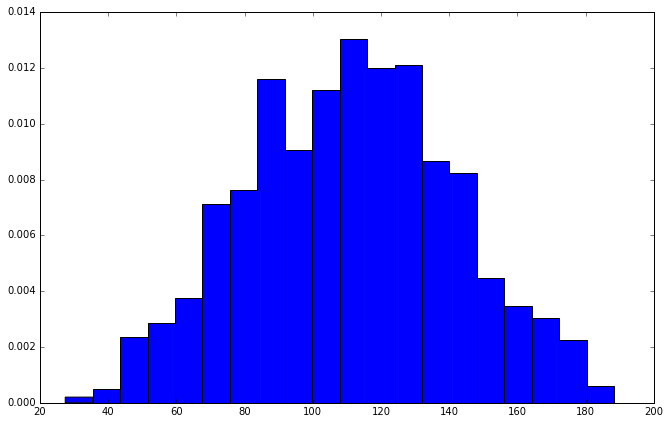

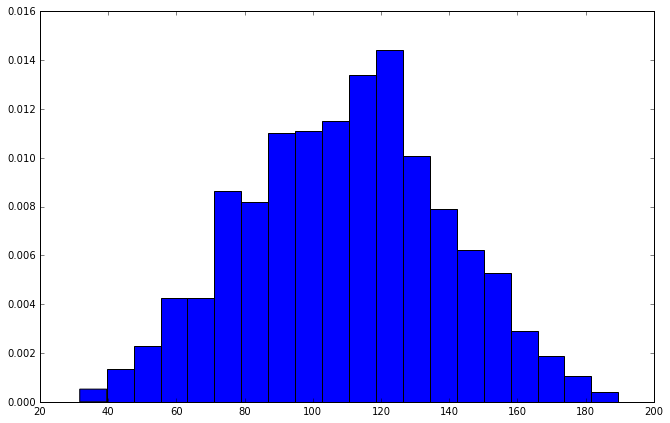

In [7]:
num_bins = 20

for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s.values, num_bins, normed=True)
    plt.show()

# 1.3. Определение точечных оценок

Составим таблицу характеристик для всей выборки (подвыборка $0$) и для каждой подвыборки (подвыборки $1-10$).

In [8]:
import pandas as pd
import scipy.stats as st

d = {}

for i in range(len(samples)):
    s = samples[i]
    stat = {}
    stat[r'$\bar{x}$'] = s.mean()
    stat[r'$x_{med}$'] = s.median()
    stat[r'$x_{mid}$'] = s.mid()
    stat[r'$x_{mode}$'] = s.mode()
    stat[r'$s^2$'] = s.variance()
    stat[r'$s$'] = s.std()
    stat[r'$\hat{m}_3$'] = s.moment(3)
    stat[r'$\hat{m}_4$'] = s.moment(4)
    stat[r'$As$'] = s.skewness()
    stat[r'$Ex$'] = s.kurtosis()
    d[i] = pd.Series(stat)


In [9]:
keys = [r'$\bar{x}$', r'$x_{med}$', r'$x_{mid}$', r'$x_{mode}$', r'$s^2$', r'$s$',
        r'$\hat{m}_3$', r'$\hat{m}_4$', r'$As$', r'$Ex$']

df = pd.DataFrame(d, index=keys).transpose()
#df.columns = ['x_avg', 'x_med', 'x_mid', 'x_mode', 's^2', 's', 'm_3', 'm_4', 'As', 'Ex']
#df.to_csv('table.csv')
df

,$\bar{x}$,$x_{med}$,$x_{mid}$,$x_{mode}$,$s^2$,$s$,$\hat{m}_3$,$\hat{m}_4$,$As$,$Ex$
0,110.146511,110.0465,109.59490,101.0970,902.224343,30.037050,89.286287,2.078277e+06,0.003295,-0.446862
1,110.869618,109.9880,112.74225,116.6610,945.986784,30.756898,915.346184,2.298768e+06,0.031460,-0.431232
2,108.598435,107.2365,110.77560,100.2140,886.847074,29.779978,1308.594444,1.975939e+06,0.049549,-0.487673
3,110.783841,110.7390,108.44205,80.9234,893.093006,29.884662,-1437.800957,2.016507e+06,-0.053871,-0.471830
4,109.480646,109.5900,110.44620,111.9190,907.382479,30.122790,689.693892,2.101637e+06,0.025233,-0.447434
5,111.178966,110.5135,107.09330,112.1120,891.254744,29.853890,-473.300657,2.031487e+06,-0.017788,-0.442531
6,108.415061,107.4640,105.88090,110.2380,848.416176,29.127584,628.240537,1.825841e+06,0.025422,-0.463441
7,110.779603,111.7285,109.87135,107.5230,970.984025,31.160617,-924.634389,2.407713e+06,-0.030560,-0.446237
8,110.864639,110.6990,112.72430,102.1330,877.698520,29.625977,12.563856,1.987471e+06,0.000483,-0.420057
9,110.953035,111.8490,107.89855,106.6420,923.538987,30.389784,244.508421,2.162533e+06,0.008712,-0.464567


Каждую характеристику изобразим на графиках. Красной точкой отмечена характеристика всей выборки, а синими - характеристики каждой из подвыборок.

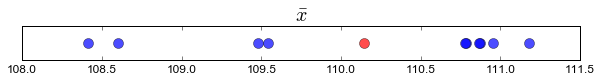

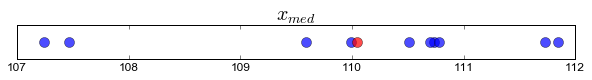

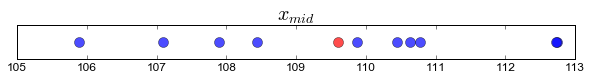

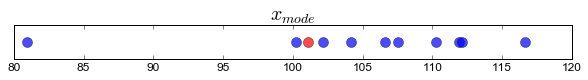

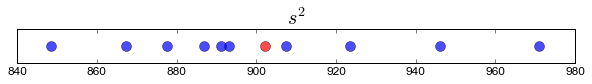

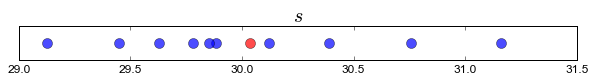

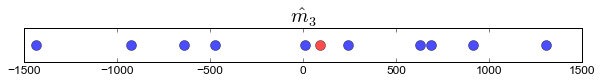

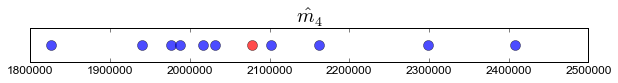

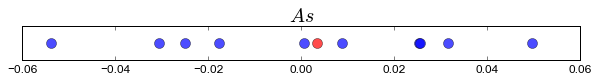

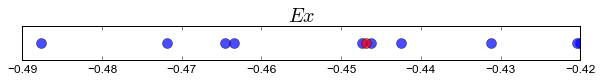

In [10]:
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

size = len(d) - 1

for i in range(len(keys)):
    key = keys[i]
    y = np.zeros(size)
    plt.figure(figsize=(10, 0.6))
    plt.title(key, fontsize=20)
    plt.plot([d[i][key] for i in range(1, size + 1)], y, marker='o', linestyle='None', alpha=0.7, markersize=10)
    plt.plot(d[0][key], 0, marker='o', color='r', alpha=0.7, markersize=10)
    plt.yticks([])
    plt.xticks(fontsize=12)
    plt.show()

In [11]:
print(samples[0].percentile(2.5), end=' -- ')
print(samples[0].percentile(97.5))

51.46851 -- 167.7943


Получили границы интерквантильного промежутка для $P = 0.95$:
$$J_{0.95} \approx [51, 168]$$

# 1.4. Определение интервальных оценок

Будем определять интервальные оценки с вероятностью $Q = 0.8$.

In [12]:
q = 0.8

### Математическое ожидание

Найдем интервальные оценки математического ожидания для всей выборки (первая строка) и для каждой подвыборки. Изобразим оценки на одном графике.

In [13]:
for sample in samples:
    print(sample.interval_mean(0.8))

(109.79798341004171, 110.49503826208947)
(109.74051308456087, 111.99872199740629)
(107.50519347694107, 109.69167570338679)
(109.6867572672603, 111.88092551962492)
(108.37482018666911, 110.58647210841285)
(110.08301109866055, 112.27492004888042)
(107.34576987070098, 109.48435258831539)
(109.63567741751298, 111.92352782838866)
(109.77705160537454, 111.95222691921563)
(109.83740735437517, 112.06866231775599)
(108.4601545933521, 110.62237573451678)


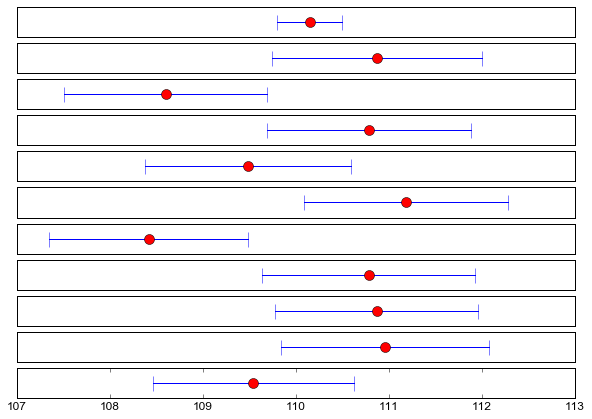

In [14]:
fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    xes, y = list(s.interval_mean(0.8)), [0, 0]
    ax.plot(xes, y, marker = '|', markersize=15)
    ax.plot(s.mean(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

### Дисперсия

Найдем интервальные оценки дисперсии для всей выборки (первая строка) и для каждой подвыборки. Изобразим оценки на одном графике.

In [15]:
for sample in samples:
    print(sample.interval_variance(0.8))

(887.6282171287985, 917.24305488751872)
(899.01469504446288, 997.39849714189847)
(842.81151210321264, 935.04471081427698)
(848.74730861511102, 941.63009206882339)
(862.32725041859237, 956.69615675133332)
(847.00032374947762, 939.69192566385027)
(806.28886478553818, 894.52520234896701)
(922.77072167253903, 1023.7542679513335)
(834.11722144038822, 925.3989592057485)
(877.68152242484871, 973.73072571685009)
(824.21169963614602, 914.40942520211479)


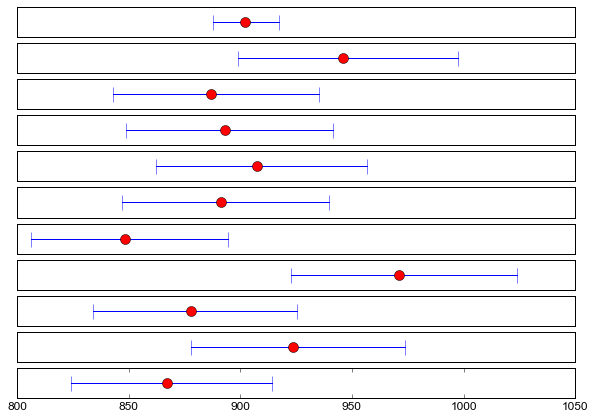

In [16]:
fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    xes, y = list(s.interval_variance(0.8)), [0, 0]
    ax.plot(xes, y, marker = '|', markersize=15)
    ax.plot(s.variance(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

### Толерантные пределы

#### Параметрические

In [17]:
from scipy.misc import comb

for sample in samples:
    print(sample.parametric_confidence_interval(0.8))

(53.496635457991722, 166.79638621413946)
(52.862107629205333, 168.87712745276184)
(52.433396581052669, 164.76347259927519)
(54.421369381597145, 167.14631340528808)
(52.669064171142018, 166.29222812393994)
(54.874529154119372, 167.48340199342158)
(53.480436942305325, 163.34968551671105)
(52.010679769699571, 169.54852547620206)
(54.990046411403682, 166.73923211318649)
(53.637901737537838, 168.26816793459332)
(53.999431295461306, 165.08309903240757)


# 2.1

Остановим выбор на трех основных распределениях:
* Нормальное
* Логнормальное
* Гамма (Эрланга)

<img src="dist_info.png" width=1000px>

# 2.2

## Нормальное распределение

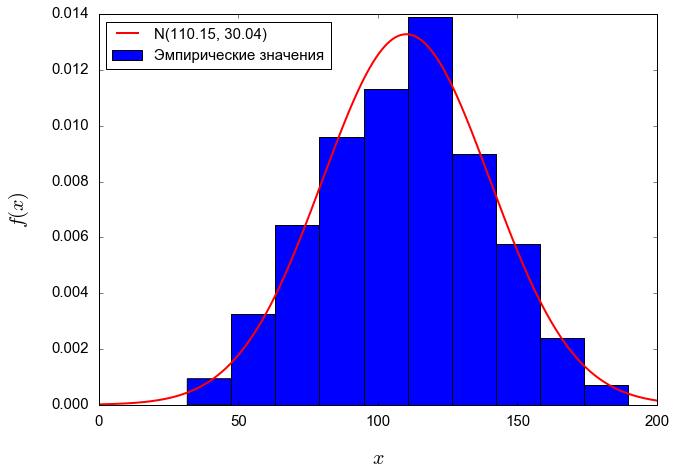

In [18]:
import matplotlib.mlab as mlab

loc, scale = st.norm.fit(x)
xes = np.linspace(0, 200, num)

norm_mu = loc
norm_sigma = scale

norm_pdf = st.norm.pdf(xes, loc=loc, scale=scale)
norm_cdf = st.norm.cdf(xes, loc=loc, scale=scale)

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, norm_pdf, label='N({0:.2f}, {1:.2f})'.format(norm_mu, norm_sigma), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_norm.png')
plt.show()


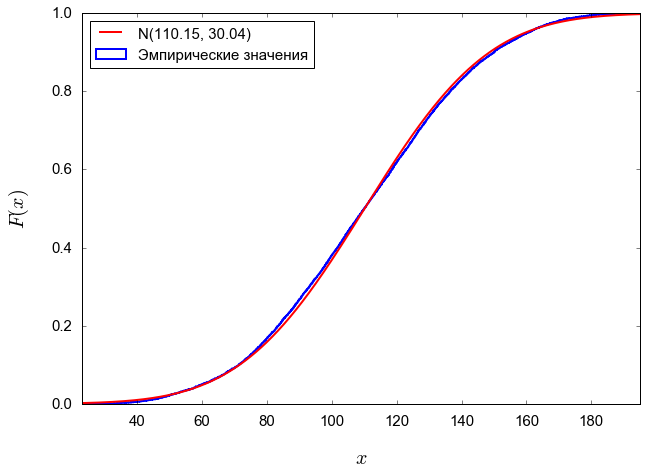

In [19]:
plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, norm_cdf, label='N({0:.2f}, {1:.2f})'.format(norm_mu, norm_sigma), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_norm.png')
plt.show()


## Логнормальное распределение

0.0248120120924
-1094.56219139
1204.35542043


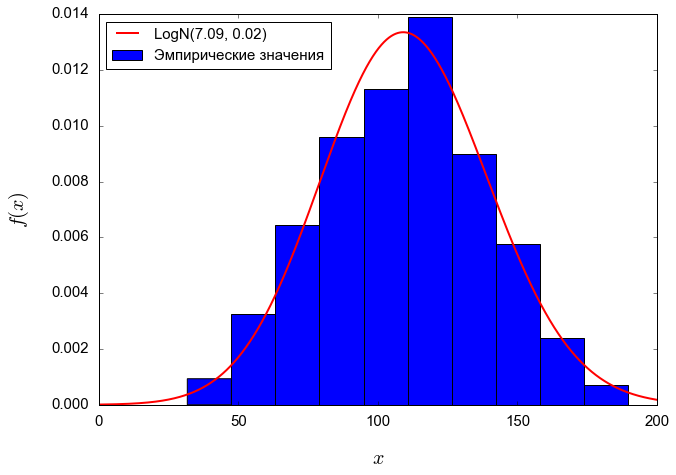

In [20]:
shape, loc, scale = st.lognorm.fit(x)

print(shape)
print(loc)
print(scale)

logn_mu = math.log(scale)
logn_sigma = shape

logn_pdf = st.lognorm.pdf(xes, logn_sigma, loc=loc, scale=math.exp(logn_mu))
logn_cdf = st.lognorm.cdf(xes, logn_sigma, loc=loc, scale=math.exp(logn_mu))

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, logn_pdf, label='LogN({0:.2f}, {1:.2f})'.format(logn_mu, logn_sigma), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_lognorm.png')
plt.show()


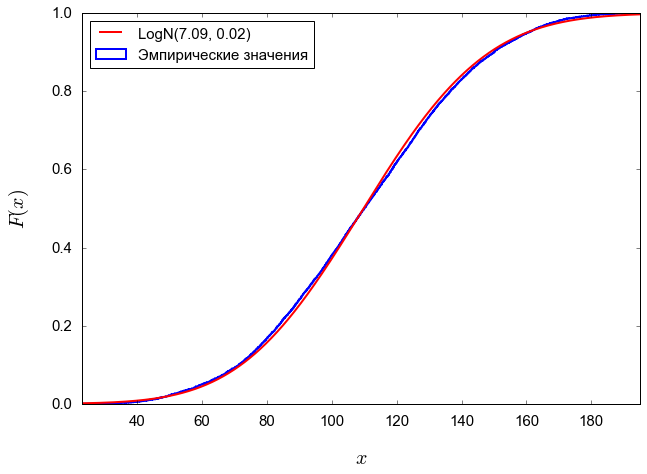

In [21]:
plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, logn_cdf, label='LogN({0:.2f}, {1:.2f})'.format(logn_mu, logn_sigma), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_lognorm.png')
plt.show()


## Гамма-распределение

368192.875514
-18115.8843982
0.0495013158634


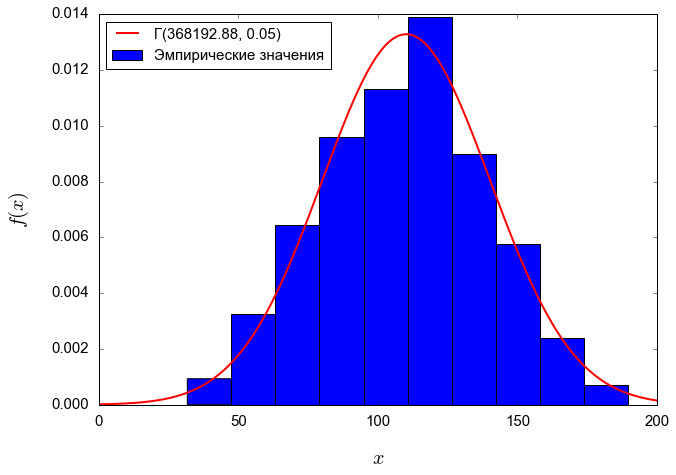

In [22]:
shape, loc, scale = st.gamma.fit(x)

print(shape)
print(loc)
print(scale)

gamma_k = shape
gamma_omega = scale

gamma_pdf = st.gamma.pdf(xes, gamma_k, loc=loc, scale=gamma_omega)
gamma_cdf = st.gamma.cdf(xes, gamma_k, loc=loc, scale=gamma_omega)

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, gamma_pdf, label='Г({0:.2f}, {1:.2f})'.format(gamma_k, gamma_omega), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_gamma`.png')
plt.show()


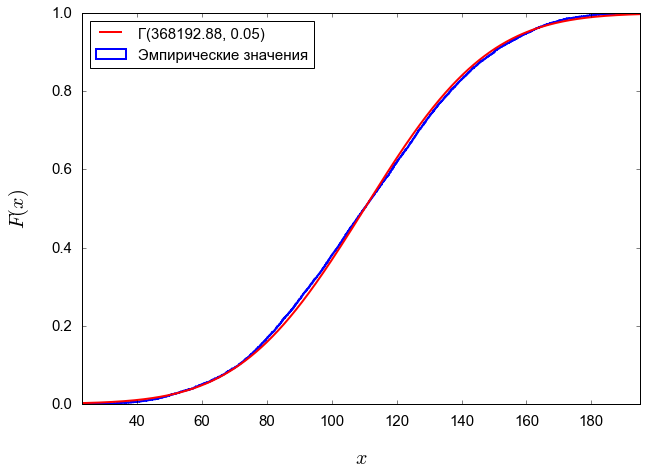

In [23]:
plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, gamma_cdf, label='Г({0:.2f}, {1:.2f})'.format(gamma_k, gamma_omega), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_gamma.png')
plt.show()


# 2.3